In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score,classification_report,confusion_matrix
from transformers import DistilBertTokenizer, DistilBertModel
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import torch
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.datasets import make_moons
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np


from sklearn.metrics import accuracy_score, f1_score
from transformers import DistilBertTokenizer, DistilBertModel
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm


In [2]:
dataset = load_dataset("imdb")

README.md: 0.00B [00:00, ?B/s]

C:\Users\leala\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\leala\.cache\huggingface\hub\datasets--imdb. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better perform

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [89]:
type(dataset['train'].__getitem__(0)['text'])

str

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Dispositivo atual: {device}')

Dispositivo atual: cuda


In [280]:
train_csv = pd.read_csv('playground_data/train_balanced.csv')

In [281]:
train_csv.head(5)

,Unnamed: 0.1,Unnamed: 0,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,num_reported_accidents,accident_risk,classification
0,0,0,urban,2,0.06,35,daylight,rainy,False,True,1,0.13,tranquila
1,1,1,urban,4,0.99,35,daylight,clear,True,False,0,0.35,media
2,4,4,rural,1,0.58,60,daylight,foggy,False,False,1,0.56,media
3,5,5,highway,3,0.54,70,night,foggy,True,False,0,0.61,media
4,6,6,highway,1,0.04,45,night,foggy,False,True,2,0.20,tranquila


In [282]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [283]:
#X = train_csv[['num_lanes','curvature','speed_limit','num_reported_accidents']]
X = train_csv[['road_type','lighting','weather','road_signs_present','public_road']]
y = train_csv['accident_risk']
#reduced train-test for quicker testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
#reduced train-test for quicker testing
print(X_train[:5000].shape, X_test[:1000].shape, y_train[:5000].shape, y_test[:1000].shape)
X_train = X_train[:1000]
X_test = X_test[:200]
y_train = y_train[:1000]
y_test = y_test[:200]
X_train.head()

(5000, 5) (1000, 5) (5000,) (1000,)


,road_type,lighting,weather,road_signs_present,public_road
195428,highway,dim,clear,False,True
234624,highway,dim,foggy,False,False
27929,highway,daylight,rainy,True,True
173554,rural,dim,foggy,True,False
252565,urban,daylight,foggy,False,False


In [284]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomDataset(Dataset):
    def __init__(self, labels, features, transform=None, target_transform=None):
        self.labels = labels
        self.features = features
        self.transform = transform
        self.target_transform = target_transform
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):

        return self.features[idx].tolist(), self.labels[idx]

In [285]:
X_train = X_train.to_numpy(dtype=str)
y_train = y_train.to_numpy(dtype=np.float64)

X_test = X_test.to_numpy(dtype=str)
y_test = y_test.to_numpy(dtype=np.float64)

dataset_train =CustomDataset(y_train,X_train)
dataset_test =CustomDataset(y_test,X_test)

dataset_train[0][0]

['highway', 'dim', 'clear', 'False', 'True']

In [286]:
def encode_batch(model, batch):
    enc = tokenizer(batch[0][0],
                    padding=True,
                    truncation=True,
                    return_tensors="pt",
                    max_length=256
                    )
    enc = enc.to(model.device)
    with torch.no_grad():
        out = model(**enc)
    # Pega embedding do token [CLS], que está em out.last_hidden_state[:,0,:]
    return out.last_hidden_state[:,0,:].cpu()

def build_embeddings(model, dataset_split):
    loader = DataLoader(dataset_split, batch_size=128, shuffle=False)
    all_embs, all_labels = [], []
    for batch in tqdm(loader):
        embs = encode_batch(model, batch)
        all_embs.append(embs)
        all_labels.append(batch[1])
    return torch.vstack(all_embs), torch.hstack(all_labels)

model.eval()
train_embs, train_labels = build_embeddings(model, dataset_train)
test_embs, test_labels = build_embeddings(model, dataset_test)


100%|██████████| 8/8 [00:00<00:00, 25.07it/s]

100%|██████████| 2/2 [00:00<00:00, 62.50it/s]


In [233]:
train_embs.shape

torch.Size([1000, 768])

In [287]:
class MLP(nn.Module):
    def __init__(self, input_dim=768, hidden_dim=256, num_classes=1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, round(hidden_dim/2)),
            nn.ReLU(),
            nn.Linear(round(hidden_dim/2), round(hidden_dim/4)),
            nn.ReLU(),
            nn.Linear(round(hidden_dim/4), num_classes)
        )

    def forward(self, x):
        return self.net(x)

In [288]:
train_embs[0].shape

torch.Size([768])

In [293]:
train_tensor = torch.utils.data.TensorDataset(torch.tensor(train_embs, dtype=torch.float32),
                                              torch.tensor(train_labels, dtype=torch.float32)
                                              )
test_tensor = torch.utils.data.TensorDataset(torch.tensor(test_embs, dtype=torch.float32),
                                             torch.tensor(test_labels, dtype=torch.float32)
                                             )

train_loader = DataLoader(train_tensor, batch_size=64, shuffle=True)
test_loader = DataLoader(test_tensor, batch_size=64)

C:\Users\leala\AppData\Local\Temp\ipykernel_11056\2525605531.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_tensor = torch.utils.data.TensorDataset(torch.tensor(train_embs, dtype=torch.float32),
C:\Users\leala\AppData\Local\Temp\ipykernel_11056\2525605531.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(train_labels, dtype=torch.float32)
C:\Users\leala\AppData\Local\Temp\ipykernel_11056\2525605531.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_tensor = torch.utils.data.TensorDataset(torch.tensor(test_e

In [295]:
model_mlp = MLP().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_mlp.parameters(), lr=1e-3)

for epoch in range(100):
    model_mlp.train()
    total_loss = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        out = model_mlp(X)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss {total_loss/len(train_loader):.4f}")

C:\Users\leala\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:634: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\leala\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:634: UserWarning: Using a target size (torch.Size([40])) that is different to the input size (torch.Size([40, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1: Loss 0.0471
Epoch 2: Loss 0.0409
Epoch 3: Loss 0.0403
Epoch 4: Loss 0.0410
Epoch 5: Loss 0.0405
Epoch 6: Loss 0.0401
Epoch 7: Loss 0.0405
Epoch 8: Loss 0.0397
Epoch 9: Loss 0.0421
Epoch 10: Loss 0.0408
Epoch 11: Loss 0.0408
Epoch 12: Loss 0.0406
Epoch 13: Loss 0.0398
Epoch 14: Loss 0.0404
Epoch 15: Loss 0.0401
Epoch 16: Loss 0.0403
Epoch 17: Loss 0.0409
Epoch 18: Loss 0.0400
Epoch 19: Loss 0.0401
Epoch 20: Loss 0.0406
Epoch 21: Loss 0.0401
Epoch 22: Loss 0.0400
Epoch 23: Loss 0.0409
Epoch 24: Loss 0.0417
Epoch 25: Loss 0.0402
Epoch 26: Loss 0.0401
Epoch 27: Loss 0.0398
Epoch 28: Loss 0.0399
Epoch 29: Loss 0.0403
Epoch 30: Loss 0.0400
Epoch 31: Loss 0.0404
Epoch 32: Loss 0.0400
Epoch 33: Loss 0.0406
Epoch 34: Loss 0.0404
Epoch 35: Loss 0.0401
Epoch 36: Loss 0.0399
Epoch 37: Loss 0.0401
Epoch 38: Loss 0.0401
Epoch 39: Loss 0.0401
Epoch 40: Loss 0.0400
Epoch 41: Loss 0.0403
Epoch 42: Loss 0.0404
Epoch 43: Loss 0.0401
Epoch 44: Loss 0.0404
Epoch 45: Loss 0.0399
Epoch 46: Loss 0.04

Mean Absolute Error: 0.3647499994747341
Mean Squared Error: 0.16731349929438544
Root Mean Squared Error: 0.40903972825923085
R^2 Score: -3.8820812348226497


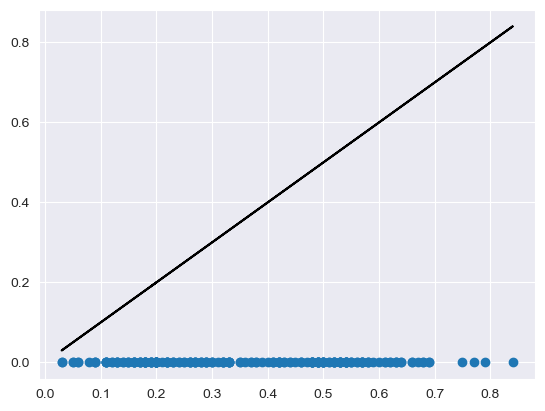

In [296]:


model_mlp.eval()
preds, trues = [], []
with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        out = model_mlp(X)
        pred = torch.argmax(out, dim=1)
        preds.extend(pred.cpu().numpy())
        trues.extend(y.cpu().numpy())

mae = mean_absolute_error(trues, preds)
mse = mean_squared_error(trues, preds)
rmse = np.sqrt(mse)
r2 = r2_score(trues, preds)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

plt.scatter(trues, preds)
plt.plot(trues, trues, 'k')
#plt.title(f'RMSE = {np.sqrt(criterion(outputs, y_train)):.2f}')
plt.show()

In [279]:
preds

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]